In [1]:
import re 
from Code_snippets import *
DNA = ReadFromFASTA("unknown_zeta.fasta", Discriptor = False)
DNA_comp = DNAtoDNA(DNA, reverse = True)
print(DNA)
print(DNA_comp) 

CAGATGACAAACATGATCTCATATCAGGGACTTGTTCGCACCTTCCTTAGGTAACATTTAGTTTGGCTAAATGTAAAGATATTGCTGTTTTATTGTTTGTTTTTGCGAGATGCGCCGCACCATTCCGAAGCAAAATTCTTAAAATGCACTCTTTTAGTGCTACCGCTGGATTACTGTGGTGCAACTAGGTTGTACTGATGCTGTTTCAGGGTTTGCCTTGTATAACAAAGCAATAGATGTGCCAAAGTTGGATAGGAGAATATTGTTATCCGGATAATGCACTGATGCCGCATCCGGTGAGCGTGCCGAAATATGGGATGTATTCCGGCACGATAAGAAGGGATTATTTACGTCGCTGACGCAGACTCATCAACACAGCAGCAAAACCAAACAATGCCGTCAGCACCCACAGCGGCCAGTTGCCGGTACGTGCGTATGGTGTGAGTCCGGTGGTCGGCGTCACGTTAGTGGTTAACACCTCGCGGGTGAACTGCGGGATCATCGCCTGAATCTCACCCTGCGGGCCAATCACCGCCGTAATGCCGTTGTTGGTGCTGCGCAACAGTGGGCGCGCCAGCTCCAGCGCACGCATTCGCGCCATCTGGAAGTGTTGCCATGGACCAATAGATTTACCAAACCACGCATCGTTGGAGATAGTCAGCAGATAGTCGGTATCCGGGCGGAAGTTATCGCGCACTTGCTCGCCGAGAATGATCTCGTAGCAAATAGCCGCAGTAAGCTCAATACCATTTGCCGACAGCGGCGGCTGGATATATGGCCCACGGCTGAACGACGACATCGGCAGATCAAAGAACGGTGCTAACGGACGCAGAATCGACTCCAGCGGGACAAACTCGCCAAACGGCACCAGATGGTTTTTGTTATAGCGATCGGCTGATTCGTAGCTGTACGGCGCACCTTTACCCAGCGTGATGATGGTGTTGTAGGTATCGTAGCGGTTCTGCTTATTGAGACGCGCGTCGACAATCCCGGTTACCAG

In [2]:
# This is #1
A_count = DNA.count("A")
C_count = DNA.count("C")
G_count = DNA.count("G")
T_count = DNA.count("T")

seq_len = len(DNA)
print("Sequence length:", seq_len, "nucleotides")

print("A:", round(A_count/seq_len*100, 4),"%")
print("C:", round(C_count/seq_len*100, 4),"%")
print("G:", round(G_count/seq_len*100, 4),"%")
print("T:", round(T_count/seq_len*100, 4),"%")

Sequence length: 50001 nucleotides
A: 25.1475 %
C: 25.5655 %
G: 25.6675 %
T: 23.6195 %


In [3]:
# This is #2
WrightSequenceToFASTA("DNA_comp.fasta", Description = "This is the complementary strand of our sequence", Sequence = DNA_comp, lineSize = 60)

In [4]:
# This is #3
# The way find_reading_frames works this make a list of open readin frames which contain the start and stop indexes and corrdinates
# as well as the sequences
# so we kindof do #5 here as well 
readingframes = find_reading_frames(DNA, MinCodons = 100, StartCodons = ["ATG"], StopCodons = ["TAG","TAA","TGA"])
readingframes_comp = find_reading_frames(DNA_comp, MinCodons = 100, StartCodons = ["ATG"], StopCodons = ["TAG","TAA","TGA"])


# this is #4
#forwardORfs file
f1 = open("Forward_orf_coordinates.csv","w")
for readingframe in readingframes:
    f1.write(str(readingframe["Start Coord"]) + ","  + (str(readingframe["End Coord"]) + "\n"))
f1.close()
#reverseORfs file
f2 = open("Reverse_orf_coordinates.csv","w")
for readingframe in readingframes_comp:
    f2.write(str(readingframe["Start Coord"]) + ","  + (str(readingframe["End Coord"]) + "\n"))
f2.close()



In [5]:
# This is #6
#  Forword Open Reading frame
i = 1
f=open("OpenReadingFrame_AA_Seqence.fasta","w")
for readingframe in readingframes:
    AA = DNAtoAA(readingframe["Sequence"])
    WrightSequenceToFASTA("OpenReadingFrame_AA_Seqence.fasta", Description = "orf" + str(i), Sequence = AA, lineSize = 60, writetype = "a")
    i += 1
f.close()
#  Complementrary Open Reading frame
i = 1
f=open("OpenReadingFrame_Complemenary_AA_Seqence.fasta","w")
for readingframe in readingframes_comp:
    AA = DNAtoAA(readingframe["Sequence"])
    WrightSequenceToFASTA("OpenReadingFrame_Complemenary_AA_Seqence.fasta", Description = "orf" + str(i), Sequence = AA, lineSize = 60, writetype = "a")
    i += 1
f.close()

In [6]:
# for part #7

count = 0
min = len(DNA)
max = 0
for readingframe in readingframes:
    x = len(readingframe["Sequence"] )
    if x < min:
        min = x
    if x > max:
        max = x
    count += x

ave = count/len(readingframes)

forword_strand = ["forword_strand", str(min), str(max), str(ave)]

count2 = 0
min2 = len(DNA)
max2 = 0
for readingframe in readingframes_comp:
    x = len(readingframe["Sequence"] )
    if x < min2:
        min2 = x
    if x > max2:
        max2 = x
    count2 += x

ave2 = count2/len(readingframes)

forword_strand2 = ["complement_strand", str(min2), str(max2), str(ave2)]

file = open("Number7.csv","w")
file.write("strand, min orf length (nuculitieds), max orf length (nuculitieds), average orf length (nuculitieds) \n")
file.write(",".join(forword_strand) + "\n")
file.write(",".join(forword_strand2)+ "\n")

45

In [7]:
# this is #8 
file2 = open("DNA_Sequence.gff", "w")

file_string2 = ""
line = ""

gene_num = 1
for orf in readingframes:
    begin = orf["Start Coord"]
    end = orf["End Coord"]
    gene_name = "ORF" + str(gene_num) 
    line += "unknown" + "\t" + gene_name + "\t" + "gene" + "\t" + str(begin) + "\t" + str(end) + "\t" + "-" + "\t" + "+" + "\t" + "-" + "\t" + "ID" + "\n"
    file_string2 += line
    line = ""
    gene_num += 1

file2.write(file_string2)
file2.close()

print(file_string2)

unknown	ORF1	gene	1952	2371	-	+	-	ID
unknown	ORF2	gene	2499	2810	-	+	-	ID
unknown	ORF3	gene	3975	4541	-	+	-	ID
unknown	ORF4	gene	5114	5542	-	+	-	ID
unknown	ORF5	gene	6102	7277	-	+	-	ID
unknown	ORF6	gene	10944	11378	-	+	-	ID
unknown	ORF7	gene	11855	12610	-	+	-	ID
unknown	ORF8	gene	13000	13377	-	+	-	ID
unknown	ORF9	gene	13505	13825	-	+	-	ID
unknown	ORF10	gene	13917	14459	-	+	-	ID
unknown	ORF11	gene	14945	16891	-	+	-	ID
unknown	ORF12	gene	17094	18758	-	+	-	ID
unknown	ORF13	gene	19335	20741	-	+	-	ID
unknown	ORF14	gene	20791	21117	-	+	-	ID
unknown	ORF15	gene	21219	21533	-	+	-	ID
unknown	ORF16	gene	22089	22472	-	+	-	ID
unknown	ORF17	gene	23988	24533	-	+	-	ID
unknown	ORF18	gene	24559	26199	-	+	-	ID
unknown	ORF19	gene	26413	26907	-	+	-	ID
unknown	ORF20	gene	30025	30372	-	+	-	ID
unknown	ORF21	gene	34696	35097	-	+	-	ID
unknown	ORF22	gene	35204	35668	-	+	-	ID
unknown	ORF23	gene	36215	36520	-	+	-	ID
unknown	ORF24	gene	37103	37993	-	+	-	ID
unknown	ORF25	gene	38268	38594	-	+	-	ID
unknown	ORF26	gene	

In [8]:
# this is #8 continued
file3 = open("DNA_Complement_Sequence.gff", "w")

file_string2 = ""
line = ""

gene_num = 1
for orf in readingframes:
    begin = orf["Start Coord"]
    end = orf["End Coord"]
    gene_name = "ORF" + str(gene_num) 
    line += "unknown" + "\t" + gene_name + "\t" + "gene" + "\t" + str(begin) + "\t" + str(end) + "\t" + "-" + "\t" + "+" + "\t" + "-" + "\t" + "ID" + "\n"
    file_string2 += line
    line = ""
    gene_num += 1

file3.write(file_string2)
file3.close()

print(file_string2)

unknown	ORF1	gene	1952	2371	-	+	-	ID
unknown	ORF2	gene	2499	2810	-	+	-	ID
unknown	ORF3	gene	3975	4541	-	+	-	ID
unknown	ORF4	gene	5114	5542	-	+	-	ID
unknown	ORF5	gene	6102	7277	-	+	-	ID
unknown	ORF6	gene	10944	11378	-	+	-	ID
unknown	ORF7	gene	11855	12610	-	+	-	ID
unknown	ORF8	gene	13000	13377	-	+	-	ID
unknown	ORF9	gene	13505	13825	-	+	-	ID
unknown	ORF10	gene	13917	14459	-	+	-	ID
unknown	ORF11	gene	14945	16891	-	+	-	ID
unknown	ORF12	gene	17094	18758	-	+	-	ID
unknown	ORF13	gene	19335	20741	-	+	-	ID
unknown	ORF14	gene	20791	21117	-	+	-	ID
unknown	ORF15	gene	21219	21533	-	+	-	ID
unknown	ORF16	gene	22089	22472	-	+	-	ID
unknown	ORF17	gene	23988	24533	-	+	-	ID
unknown	ORF18	gene	24559	26199	-	+	-	ID
unknown	ORF19	gene	26413	26907	-	+	-	ID
unknown	ORF20	gene	30025	30372	-	+	-	ID
unknown	ORF21	gene	34696	35097	-	+	-	ID
unknown	ORF22	gene	35204	35668	-	+	-	ID
unknown	ORF23	gene	36215	36520	-	+	-	ID
unknown	ORF24	gene	37103	37993	-	+	-	ID
unknown	ORF25	gene	38268	38594	-	+	-	ID
unknown	ORF26	gene	

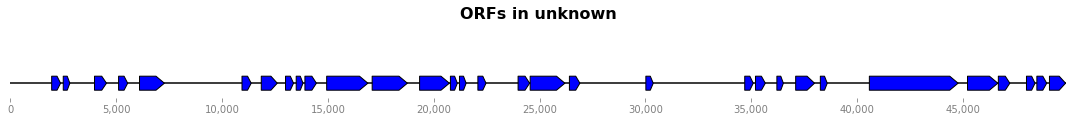

In [9]:
# #8 continued

from dna_features_viewer import BiopythonTranslator

def features_properties(f):
    """Features get a  color."""
    label = None
    color = {
        "Mutant": "firebrick",
        "Active site": "yellow",
        "Beta strand": "lightyellow",
        "Chain": "lightcyan",
        "Helix": "honeydew",
        "Initiator methionine": "white",
        "Metal binding": "lightsteelblue",
        "Turn": "moccasin",
    }.get(f.type, "blue")
    return dict(color=color, label=label)

translator = BiopythonTranslator(features_properties=features_properties)
graphic_record = translator.translate_record("DNA_Sequence.gff")
ax, _ = graphic_record.plot(
    figure_width=15, max_label_length=100, elevate_outline_annotations=True,
)
ax.set_title("ORFs in unknown", fontweight="bold", fontsize=16)
ax.figure.tight_layout()
ax.figure.savefig("DNA_Sequence.png", bbox_inches="tight")

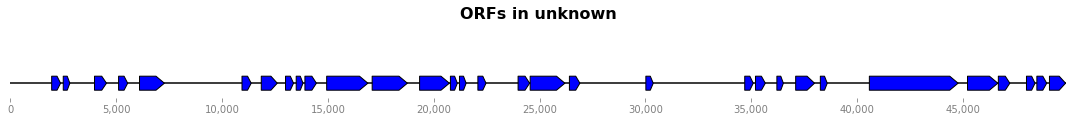

In [10]:
translator = BiopythonTranslator(features_properties=features_properties)
graphic_record = translator.translate_record("DNA_Complement_Sequence.gff")
ax, _ = graphic_record.plot(
    figure_width=15, max_label_length=100, elevate_outline_annotations=True,
)
ax.set_title("ORFs in unknown", fontweight="bold", fontsize=16)
ax.figure.tight_layout()
ax.figure.savefig("DNA_Complement_Sequence.png", bbox_inches="tight")